In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [6]:
path_df = r'..\..\models\reid\Pycnopodia_helianthoides_full_event-unaware_training-split_2024-05-03-18-41__2024-05-13-04-10-58__0__densenet121__PT-True\logs\test_learning_logs.csv'
df = pd.read_csv(path_df)
df.head()

,epoch,iteration,loss
0,0,0,0.042372
1,0,1,0.000000
2,0,2,0.097591
3,0,3,0.000000
4,0,4,0.012016


In [7]:
epochs = sorted(df['epoch'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149]

In [11]:
num_above_zero_by_epoch = []
num_equal_zero_by_epoch = []
for epoch in epochs:
    df_epoch = df[df['epoch'] == epoch]
    num_above_zero = len(df_epoch[df_epoch['loss'] > 0])
    num_equal_zero = len(df_epoch[df_epoch['loss'] == 0])
    num_above_zero_by_epoch.append(num_above_zero)
    num_equal_zero_by_epoch.append(num_equal_zero)

In [13]:
ratio_above_zero_by_epoch = np.array(num_above_zero_by_epoch) / (np.array(num_above_zero_by_epoch) + np.array(num_equal_zero_by_epoch))

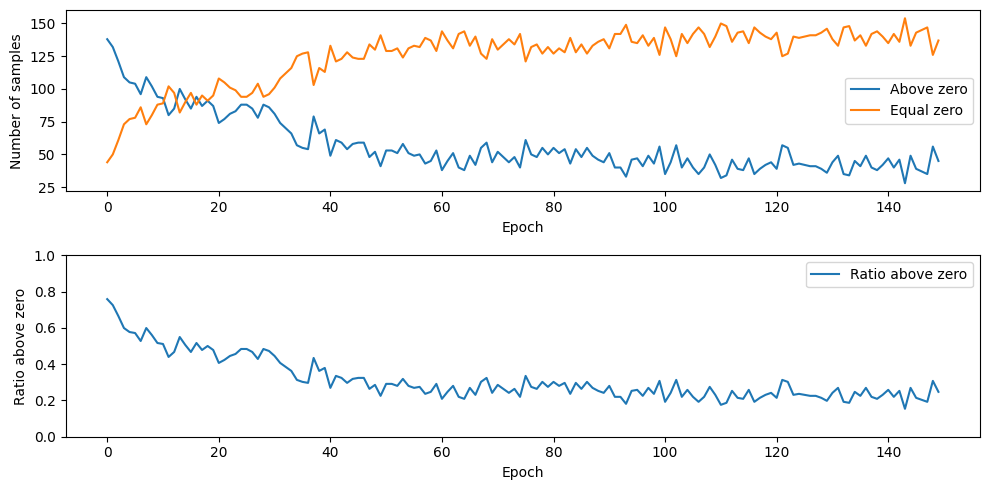

In [17]:
fig, axs = plt.subplots(2,1,figsize=(10,5))

ax = axs[0]
ax.plot(epochs, num_above_zero_by_epoch, label='Above zero')
ax.plot(epochs, num_equal_zero_by_epoch, label='Equal zero')

ax.set_xlabel('Epoch')
ax.set_ylabel('Number of samples')

ax.legend()

ax = axs[1]

ax.plot(epochs, ratio_above_zero_by_epoch, label='Ratio above zero')

ax.set_xlabel('Epoch')
ax.set_ylabel('Ratio above zero')

ax.set_ylim(0,1)

ax.legend()

plt.tight_layout()

plt.show()